In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from roms_utils import set_depth, stretching

In [2]:
# Notes from Phil


In [3]:
def closest_inx(lat1, lon1, lat2, lon2):
    # lat1, lon1 - 2D rho arrays
    # lat2, lon2 - target coordinates
    p = 0.017453292519943295
    hav = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    dist = 12742 * np.arcsin(np.sqrt(hav))
    rav_inx = np.nanargmin(dist)
    unrav_inx = np.unravel_index(rav_inx, lon1.shape)
    return unrav_inx

In [28]:
df = pd.read_excel('MSMDI_stations_unique.xlsx')

In [29]:
df = df.drop(columns='Unnamed: 138')
df = df[df.columns.drop(list(df.filter(regex='_surf')))]
df = df[df.columns.drop(list(df.filter(regex='z01_PAR0')))]

In [30]:
months = ['Jan', 'Feb',
          'Mar', 'Apr', 'May',
          'Jun', 'Jul', 'Aug',
          'Sep', 'Oct', 'Nov', 'Dec']

In [31]:
cols = ['chl_' + m + '_mg/m3' for m in months]

In [32]:
# add chl columns
df2 = pd.DataFrame(columns=cols)
df = pd.concat([df,df2])
df['ID'] = df['ID'].astype(int)

In [35]:
df

,stat_code,name,ID,long,lat,year,DIN_Jan [mmol N/m^3],DIN_Feb [mmol N/m^3],DIN_Mar [mmol N/m^3],DIN_Apr [mmol N/m^3],...,chl_Mar_mg/m3,chl_Apr_mg/m3,chl_May_mg/m3,chl_Jun_mg/m3,chl_Jul_mg/m3,chl_Aug_mg/m3,chl_Sep_mg/m3,chl_Oct_mg/m3,chl_Nov_mg/m3,chl_Dec_mg/m3
0,NaN,Arendal,0,8.830000,58.390000,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Arendal,0,8.830000,58.390000,2018.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Arendal,0,8.830000,58.390000,2019.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,510,Eigebrekk,1,7.602960,58.010900,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,510,Eigebrekk,1,7.602960,58.010900,2018.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NaN,"Håøyfjorden, BN1",54,10.556618,59.677308,2018.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,NaN,"Håøyfjorden, BN1",54,10.556618,59.677308,2019.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,0101020601-C,0101020601-C,55,10.549133,59.685789,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,0101020601-C,0101020601-C,55,10.549133,59.685789,2018.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# table with stations coordinates
st = df.groupby('ID').first()[['long', 'lat']]

In [147]:
# main dataset
ds = xr.open_mfdataset('all_depths/martini800*.nc', compat='override').squeeze()
ds = ds.reindex(s_rho=list(reversed(ds.s_rho)))  # flip s_rho

C:\Users\ABE\AppData\Local\miniconda3\envs\Work\lib\site-packages\xarray\core\indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
C:\Users\ABE\AppData\Local\miniconda3\envs\Work\lib\site-packages\xarray\core\indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

In [ ]:
ds[]

In [ ]:
# ds[['ocean_time', 's_rho', 'lon_rho', 'lat_rho',
#     'DIN', 'N4_n',
#     'TotN', 'N1_p', 'TotP',
#     'B1_DOC', 'light_POC',
#     'salt', 'temp', 'light_Chl']].to_netcdf('MARTINI800bgc.nc')

In [10]:
grd = xr.open_dataset('rdrag_new-v5.nc')

In [11]:
h = grd['h'].values

In [12]:
Tcline = 20
theta_s = 5.0
theta_b = 0.1
Vtransform = 2
Vstretching = 2
hc = 20
N = 42

In [13]:
z_rho = np.flip(-set_depth(Vtransform, Vstretching,
                           theta_s, theta_b, hc, N, 1, h,
                           zeta=0, report=1),
               axis=2)

In [14]:
z_w = np.flip(-set_depth(Vtransform, Vstretching,
                         theta_s, theta_b, hc, N+1, 5, h,  # Note N + 1 here !!!
                         zeta=0, report=1),  
              axis=2)

In [15]:
hz = np.diff(z_w)

In [16]:
hz.max()

31.917339520330984

In [26]:
list(ds.keys())

['ocean_time_bnds',
 'B1_DOC',
 'Cs_r',
 'h',
 'light_POC',
 'light_TSM',
 'DIN',
 'N1_p',
 'N3_n',
 'N4_n',
 'N5_s',
 'O2_o',
 'O3_TA',
 'O3_c',
 'TRSi',
 'TotN',
 'TotP',
 'light_Chl',
 'salt',
 'temp']

In [ ]:
# (ocean_time: 36 s_rho: 42 eta_rho: 426 xi_rho: 480)

In [17]:
din = xr.open_dataset('all_depths/martini800_v9ae_DIN_monmean.nc')

In [18]:
lon_rho = din.lon_rho.values
lat_rho = din.lat_rho.values
# to exclude land from distance calculations
lon_rho[np.isnan(din['DIN'].values[0,-1,:,:])] = np.nan
lat_rho[np.isnan(din['DIN'].values[0,-1,:,:])] = np.nan

In [20]:
variables = ['DIN', 'N4_n',
             'TotN', 'N1_p', 'TotP',
             'B1_DOC', 'light_POC',
             'salt', 'temp', 'light_Chl']
nv = len(variables)

In [21]:
din.close()

In [52]:
# dictionary of variable names and lists of datasets
# {'vname': [st0, st1, st2 ... st55]}
vdict = dict((v, []) for v in variables)

In [53]:
depthmax = 30
st_h = []  # bathymetry at stations

for v in variables:
    print(v)
    ds = xr.open_dataset('all_depths/for_msmdi/martini800_v9ae_%s_monmean.nc' % v)
    # flip z-axis
    ds = ds.reindex(s_rho=list(reversed(ds.s_rho)))
    # get variable (DataArray)
    dsv = ds[v]
    for i, row in st.iterrows():
        print(i)
        # index of closest MARTINI point to the station
        xloc, yloc = closest_inx(lat_rho, lon_rho, row['lat'], row['long'])
        
        # depth at station
        st_h.append(h[xloc,yloc])
        
        # z_rho at station
        z_rho_st = z_rho[xloc,yloc,:]

        # DataArray for the station
        dsv_st = dsv.isel(eta_rho=xloc,xi_rho=yloc).assign_coords({"s_rho": z_rho_st})
        dsv_st = dsv_st.rename({"s_rho": "z_rho"})

        # regular z-levels with 0.5 m step
        zreg = np.arange(z_rho_st.min(), z_rho_st.max() + 0.5, 0.5)
        # interpolate ds to regular z-levels
        dsv_st = dsv_st.interp(z_rho = zreg)
        
        # calculate mean over z_rho from 0 to depthmax m
        dsv_st_mean = dsv_st.sel(z_rho=slice(None,depthmax)).mean(dim='z_rho')
    
        v3yr = dsv_st_mean.values.reshape(3,-1)
        vdict[v].append(v3yr)
        
    ds.close()
    

DIN
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
N4_n
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
TotN
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
N1_p
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
TotP
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
B1_DOC
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
light_POC
0
1
2
3
4
5

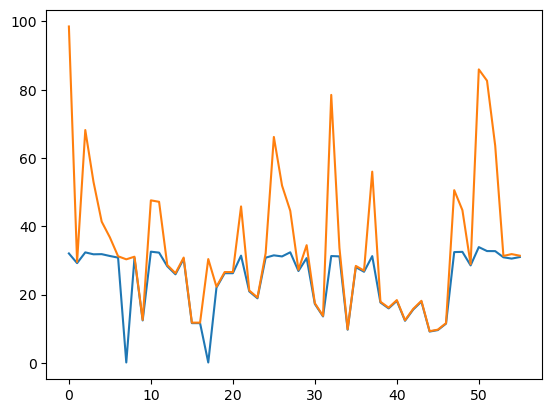

In [116]:
plt.plot(st_zmax)
plt.plot(st_h)

In [ ]:
st

In [54]:
for iv, outname in enumerate(variables):  # martini variables
    for stinx in st.index:  # station index
        ist = df.index[df['ID'] == stinx].tolist()  # indexes of station [0:3], [3:6], [6:9] ...
        # fill the columns and rows in dataframe
        # ist - rows
        # 6+12*iv:6+12*(iv+1) - columns, variables for 12 months
        df.iloc[ist, 6+12*iv:6+12*(iv+1)] = vdict[outname][stinx]

In [55]:
df.to_excel('out_martini_0_30new.xlsx')

In [39]:
df

,stat_code,name,ID,long,lat,year,DIN_Jan [mmol N/m^3],DIN_Feb [mmol N/m^3],DIN_Mar [mmol N/m^3],DIN_Apr [mmol N/m^3],...,chl_Mar_mg/m3,chl_Apr_mg/m3,chl_May_mg/m3,chl_Jun_mg/m3,chl_Jul_mg/m3,chl_Aug_mg/m3,chl_Sep_mg/m3,chl_Oct_mg/m3,chl_Nov_mg/m3,chl_Dec_mg/m3
0,NaN,Arendal,0,8.830000,58.390000,2017.0,7.949088,8.793869,9.395836,8.916915,...,0.737807,0.530779,0.55526,0.648719,0.500198,0.376693,0.345224,0.346869,0.278777,0.233999
1,NaN,Arendal,0,8.830000,58.390000,2018.0,9.719938,8.818651,9.163427,9.293838,...,1.750986,1.106411,1.176859,1.114364,1.253278,0.671416,0.311682,0.354517,0.438227,0.367907
2,NaN,Arendal,0,8.830000,58.390000,2019.0,9.560438,9.437667,8.894394,6.527257,...,0.884321,1.182023,0.622516,0.522104,0.618498,0.475452,0.331636,0.329375,0.612405,0.192577
3,510,Eigebrekk,1,7.602960,58.010900,2017.0,7.471756,7.668631,6.217905,6.497118,...,2.291143,1.614544,1.581137,1.219121,1.026536,0.911363,0.856998,0.581062,0.406328,0.295279
4,510,Eigebrekk,1,7.602960,58.010900,2018.0,9.177713,6.194204,3.463977,1.870044,...,5.003143,3.095105,1.715434,2.108403,1.534368,0.886469,0.545764,0.779765,0.879067,0.934305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NaN,"Håøyfjorden, BN1",54,10.556618,59.677308,2018.0,10.179512,6.858441,4.794538,3.003041,...,5.217135,2.168513,1.456334,1.176318,1.11819,0.585322,0.655239,1.354104,1.627511,1.336809
164,NaN,"Håøyfjorden, BN1",54,10.556618,59.677308,2019.0,9.016590,5.024706,4.791906,4.024737,...,2.872565,3.066994,1.643507,0.925726,1.113435,0.49277,0.810132,1.085865,0.963304,0.673254
165,0101020601-C,0101020601-C,55,10.549133,59.685789,2017.0,13.555748,8.219450,5.635818,5.812633,...,3.991078,2.3575,2.068012,1.010932,0.879792,0.567591,0.620827,0.937649,1.718519,0.981604
166,0101020601-C,0101020601-C,55,10.549133,59.685789,2018.0,10.077789,6.768781,4.725822,2.976140,...,5.279466,2.168067,1.422916,1.143274,1.077724,0.575229,0.644703,1.347691,1.673423,1.333894


In [40]:
ds = xr.open_dataset('all_depths/for_msmdi/martini800_v9ae_temp_monmean.nc')

In [43]:
closest_inx(lat_rho, lon_rho, 58.39, 8.83)

(272, 222)

In [46]:
temp = ds['temp'].sel(eta_rho=272, xi_rho=222).values

In [48]:
temp.shape

(36, 42)

In [51]:
z_rho[272, 222, :]

array([ 0.20004277,  0.61537125,  1.0566763 ,  1.53083998,  2.04485611,
        2.60582823,  3.22096651,  3.89758343,  4.64308784,  5.46497711,
        6.37082679,  7.36827719,  8.46501614,  9.66875712, 10.98721163,
       12.42805453, 13.99888104, 15.70715344, 17.56013553, 19.56481239,
       21.72779257, 24.05518937, 26.55247717, 29.22431834, 32.07435509,
       35.10496012, 38.31693853, 41.70917233, 45.27819748, 49.01770159,
       52.91792861, 56.96497454, 61.13995532, 65.41802558, 69.76722275,
       74.14710761, 78.50716712, 82.7849403 , 86.90382156, 90.77048849,
       94.27189309, 97.27174521])

In [56]:
temp[0,::-1]

array([5.5023513, 5.5052133, 5.508286 , 5.511835 , 5.5180864, 5.5300565,
       5.552374 , 5.591475 , 5.65004  , 5.722804 , 5.8125224, 5.9308715,
       6.066634 , 6.1984725, 6.310601 , 6.414659 , 6.5125737, 6.5977244,
       6.674476 , 6.7476444, 6.8153543, 6.8768616, 6.938123 , 6.9979362,
       7.0621443, 7.1287775, 7.1948686, 7.2599683, 7.3218374, 7.3750753,
       7.422855 , 7.4650154, 7.5020337, 7.533615 , 7.561649 , 7.5854616,
       7.606302 , 7.6243114, 7.6400056, 7.65402  , 7.666816 , 7.6776085],
      dtype=float32)